In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import csv

import preprocessing
import models

In [2]:
class StepDataset(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self,idx):
        return self.x[idx], self.y[idx]

In [3]:
# Load data here
dataPreprocessor = preprocessing.DataPreprocessor('./data')
data,cleaned_data = dataPreprocessor.load_data()

Cleaned data for ./data/person_8/ClippedawindaRecording_20230217130617.csv, 26633
Cleaned data for ./data/person_12/ClippedawindaRecording_20230403155903.csv, 25145
Cleaned data for ./data/person_12/ClippedawindaRecording_20230403160632.csv, 26967
Cleaned data for ./data/perosn_2/ClippedawindaRecording_20230217132921.csv, 22381
Cleaned data for ./data/person_5/ClippedawindaRecording_20230217123216.csv, 29623
Cleaned data for ./data/person_3/ClippedawindaRecording_20230217125431.csv, 29965
Cleaned data for ./data/person_4/ClippedawindaRecording_20230124152114.csv, 28246
Cleaned data for ./data/person_4/ClippedawindaRecording_20230206161506.csv, 25699
Cleaned data for ./data/person_4/ClippedawindaRecording_20230206162219.csv, 18354
Cleaned data for ./data/person_4/ClippedawindaRecording_20230206154634.csv, 24358
Cleaned data for ./data/person_4/ClippedawindaRecording_20230124153538.csv, 12540
Cleaned data for ./data/person_4/ClippedawindaRecording_20230124151117.csv, 18588
Cleaned data f

In [4]:
x_train = []
y_train = []

for index, row in cleaned_data.iterrows():
    i = [row[1],row[2],row[3],row[4],row[5],row[6]]
    t = [row[7], row[8]]
    x_train.append(i)
    y_train.append(t)


x_train = np.array(x_train,dtype=np.float32)
y_train = np.array(y_train,dtype=np.float32)

train_dataset = StepDataset(x_train,y_train)

batch_size = 32

# Define Data loader

train_loader = DataLoader(train_dataset,batch_size=batch_size)

print(len(train_dataset))


592665


Epoch [1/10], Loss: 0.2741
Epoch [2/10], Loss: 0.2726
Epoch [3/10], Loss: 0.2688
Epoch [4/10], Loss: 0.2660
Epoch [5/10], Loss: 0.2628
Epoch [6/10], Loss: 0.2588
Epoch [7/10], Loss: 0.2552
Epoch [8/10], Loss: 0.2530
Epoch [9/10], Loss: 0.2517
Epoch [10/10], Loss: 0.2509


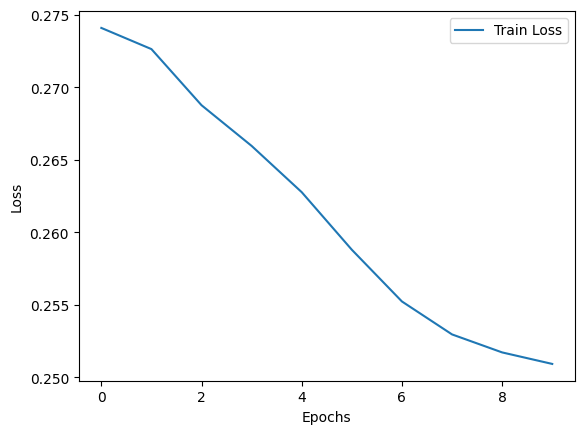

In [5]:
# MLP

mlpModel = models.getModels('m1')

mlpModel,train_loss = models.trainModel(mlpModel,train_loader,10)

models.plot(train_loss,[],'Train Loss','','Epochs','Loss','')

##### We began this assignment by trying to train the data using the MLP model since it is a basic algorithm that can be used with almost any type of data. We decided on testing this algorithm and we ended up with a fairly low loss but when tested on Kaggle, only a 0.48 accuracy was achieved.
#### As the dataset provided was fairly large, we utilised Stochastic gradient descent(SGD) to optimise the process.
#### ReLU activation functions was used between the linear layers and a sigmoid activation on the output of the network to obtain outputs as probabilities. 
#### Cross entropy loss was selected because of the binary nature of the footstep classification problem

Epoch [1/10], Loss: 0.0896
Epoch [2/10], Loss: 0.0804
Epoch [3/10], Loss: 0.0760
Epoch [4/10], Loss: 0.0732
Epoch [5/10], Loss: 0.0710
Epoch [6/10], Loss: 0.0698
Epoch [7/10], Loss: 0.0686
Epoch [8/10], Loss: 0.0679
Epoch [9/10], Loss: 0.0675
Epoch [10/10], Loss: 0.0673


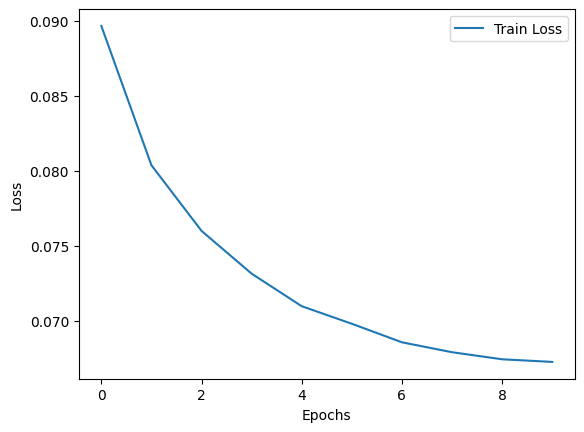

In [6]:
# GRU

gruModel = models.getModels('m2')

gruModel,train_loss = models.trainModel(gruModel,train_loader,10)

models.plot(train_loss,[],'Train Loss','','Epochs','Loss','')

##### GRUs are important due to their computational efficiency, simplified architecture, and competitive performance in modeling long-term dependencies. Their reduced complexity makes them suitable for resource-constrained environments and real-time applications

- GRUs, like LSTMs, are designed to address the vanishing gradient problem commonly encountered in traditional RNNs
- Efficient and Computationally Lightweight
- Adaptability to Different Tasks
#### By using the MSE loss function, our model aimed to minimize the average squared difference between the predicted and true values, leading to a more precise regression prediction for step-start and step-end.
#### The choice of Adam Optimiser was made due to the need for fast convergence and good performance. It is commonly used in steps sequence domains as it combines its adaptive learning rates and momentum to efficiently make updates on network parameters.


Epoch [1/50], Loss: 0.4413
Epoch [2/50], Loss: 0.4267
Epoch [3/50], Loss: 0.4231
Epoch [4/50], Loss: 0.4204
Epoch [5/50], Loss: 0.4193
Epoch [6/50], Loss: 0.4182
Epoch [7/50], Loss: 0.4175
Epoch [8/50], Loss: 0.4175
Epoch [9/50], Loss: 0.4169
Epoch [10/50], Loss: 0.4169
Epoch [11/50], Loss: 0.4167
Epoch [12/50], Loss: 0.4165
Epoch [13/50], Loss: 0.4163
Epoch [14/50], Loss: 0.4164
Epoch [15/50], Loss: 0.4166
Epoch [16/50], Loss: 0.4159
Epoch [17/50], Loss: 0.4159
Epoch [18/50], Loss: 0.4164
Epoch [19/50], Loss: 0.4165
Epoch [20/50], Loss: 0.4162
Epoch [21/50], Loss: 0.4166
Epoch [22/50], Loss: 0.4164
Epoch [23/50], Loss: 0.4167
Epoch [24/50], Loss: 0.4166
Epoch [25/50], Loss: 0.4165
Epoch [26/50], Loss: 0.4168
Epoch [27/50], Loss: 0.4167
Epoch [28/50], Loss: 0.4169
Epoch [29/50], Loss: 0.4173
Epoch [30/50], Loss: 0.4180
Epoch [31/50], Loss: 0.4177
Epoch [32/50], Loss: 0.4192
Epoch [33/50], Loss: 0.4181
Epoch [34/50], Loss: 0.4183
Epoch [35/50], Loss: 0.4172
Epoch [36/50], Loss: 0.4175
E

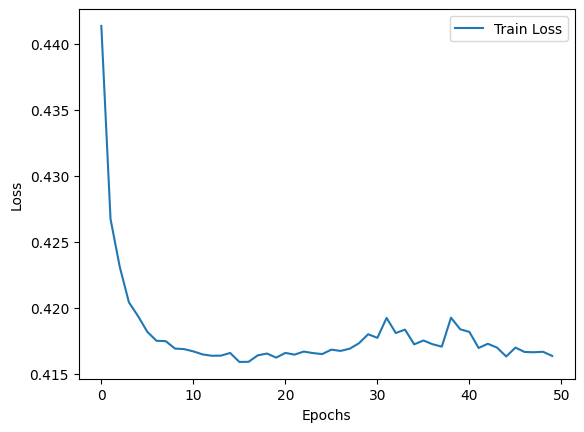

In [8]:
# LSTM

lstmModel = models.getModels('m3')

lstmModel,train_loss = models.trainModel(lstmModel,train_loader,50)

models.plot(train_loss,[],'Train Loss','','Epochs','Loss','')

##### **LSTM** is one of the variants of RNNs that finds much usefulness in modelling temporal dependencies. We found from literature that it performed well in an application of footstep detection as it captured walking(at different speeds) patterns across multiple time steps. LSTMs are generally known for their ability to remember long-term dependencies and are robust to vanishing gradient problems.
##### The choice of **Adam Optimiser** was made due to the need for fast convergence and good performance. It is commonly used in steps sequence domains as it combines its adaptive learning rates and momentum to efficiently make updates on network parameters.
##### We chose **Binary cross-entropy loss** (BCELoss) because of its suitability in classification problems; Our problem was formulated as a binary classification of step-start and step-end. As our LSTM model architecture implemented its output as a probability (sigmoid activation function), it was necessary to use Binary cross-entropy due to its suitability on such networks.
##### After tunning the model with different values for the hyperparameters, we have so far obtained best results with the following values: 

##### input_size = 6
##### hidden_dim = 64
##### n_layers = 2
##### output_size = 2
##### learning_rate = 0.001
##### n_epochs = 50